# **Import Necesarry Library**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib

# **Read the CSV file and load data**

In [14]:
data = pd.read_csv("Data lat dan lon Kota palembang.csv", usecols=["Latitude", "Longitude"])


X = data[["Latitude", "Longitude"]]
print("First five elements of X are:\n", X[:5])
print('The shape of X is:', X.shape)
X = data.values


First five elements of X are:
    Latitude   Longitude
0 -2.938783  104.760288
1 -2.906790  104.692254
2 -2.934693  104.690078
3 -2.928436  104.700182
4 -2.934685  104.690082
The shape of X is: (101, 2)


# **Assign Centroids**

In [15]:
def kMeans_init_centroids(X, K):
    # Randomly reorder the indices of examples
    randidx = np.random.permutation(X.shape[0])

    # Take the first K examples as centroids
    centroids = X[randidx[:K]]

    return centroids

# **Function to assign each data point to nearest centroid (Clustering)**

In [22]:
def find_closest_centroids(X, centroids):
 # Set K
    K = centroids.shape[0]

    # You need to return the following variables correctly
    idx = np.zeros(X.shape[0], dtype=int)

    ### START CODE HERE ###
    for i in range(X.shape[0]):
        # Array to hold distance between X[i] and each centroids[j]
        distance = []
        for j in range(centroids.shape[0]):
            norm_ij = np.linalg.norm(X[i] - centroids[j])
            distance.append(norm_ij)

        idx[i] = np.argmin(distance)





     ### END CODE HERE ###

    return idx

# **Update position of the centroid every iteration**

In [23]:
# compute_centroids

def compute_centroids(X, idx, K):



    # Useful variables
    m, n = X.shape

    # You need to return the following variables correctly
    centroids = np.zeros((K, n))

    ### START CODE HERE ###
    for k in range(K):
        points = X[idx == k]
        centroids[k] = np.mean(points, axis = 0)




    return centroids

# **Function For the training**

In [24]:
def run_kMeans(X, initial_centroids, max_iters=10, plot_progress=False):

    # Initialize values
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids
    idx = np.zeros(m)
    plt.figure(figsize=(8, 6))

    # Run K-Means
    for i in range(max_iters):

        #Output progress
        print("K-Means iteration %d/%d" % (i, max_iters-1))

        # For each example in X, assign it to the closest centroid
        idx = find_closest_centroids(X, centroids)

        def plot_progress_kMeans(X, centroids, previous_centroids, idx, K, iteration):
            plt.scatter(X[:, 0], X[:, 1], c=idx, cmap='viridis', label='Data Points')
            plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, linewidths=3, color='red', label='Centroids')
            plt.scatter(previous_centroids[:, 0], previous_centroids[:, 1], marker='o', s=100, color='blue', alpha=0.5, label='Previous Centroids')
            plt.title(f'K-Means Clustering - Iteration {iteration}')
            plt.xlabel('Latitude')
            plt.ylabel('Longitude')
            plt.legend()
            plt.show()
        # Optionally plot progress
        if plot_progress:

            plot_progress_kMeans(X, centroids, previous_centroids, idx, K, i)
            previous_centroids = centroids

        # Given the memberships, compute new centroids
        centroids = compute_centroids(X, idx, K)
    plt.show()
    return centroids, idx

# **Training**

K-Means iteration 0/19


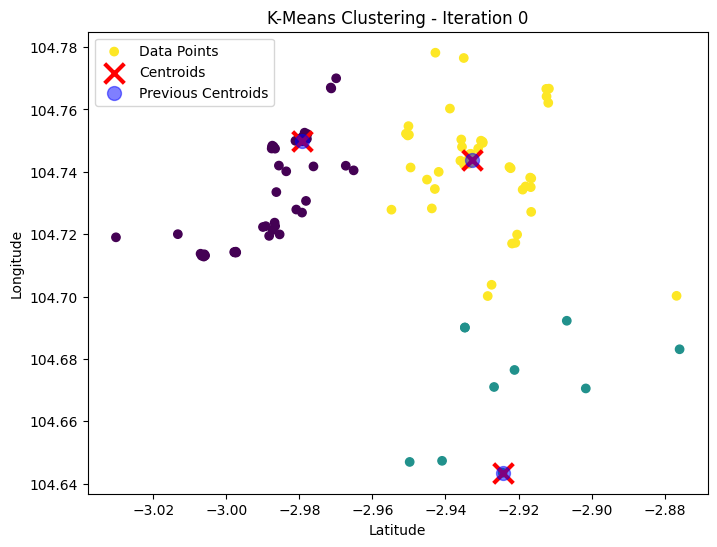

K-Means iteration 1/19


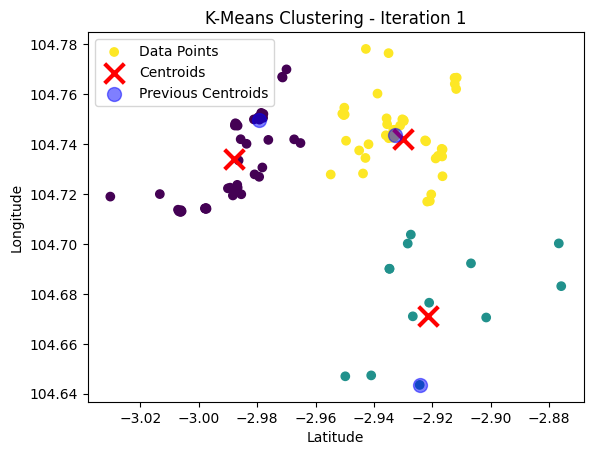

K-Means iteration 2/19


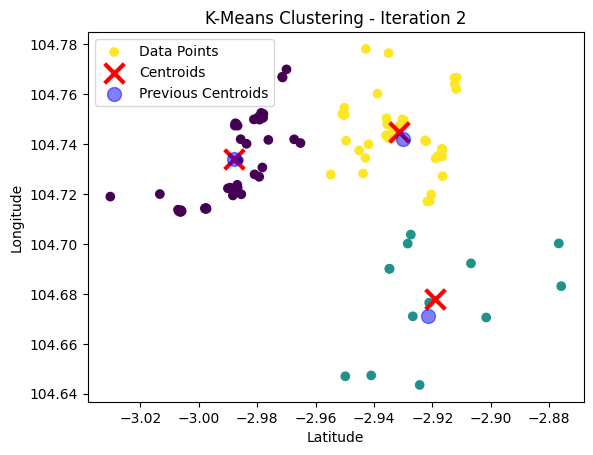

K-Means iteration 3/19


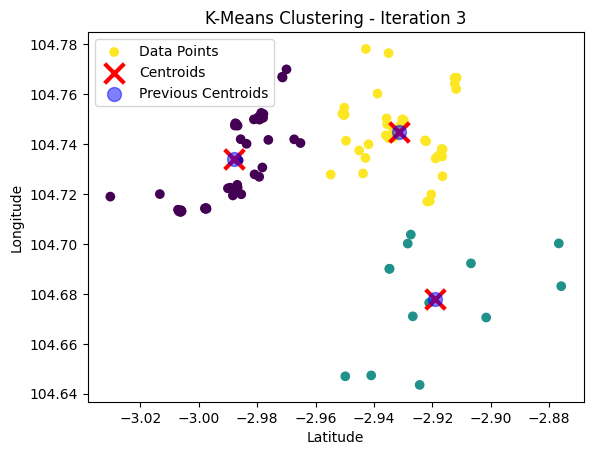

K-Means iteration 4/19


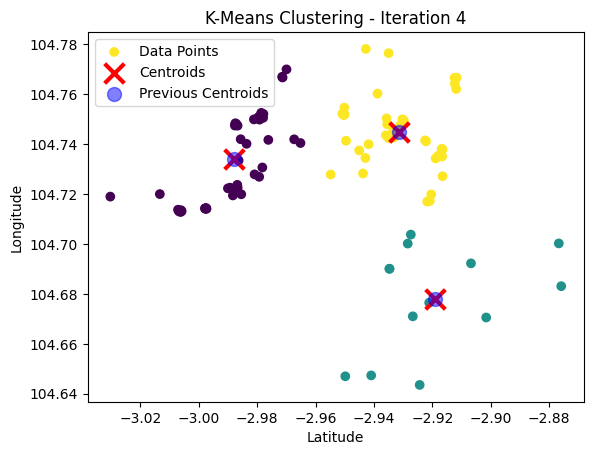

K-Means iteration 5/19


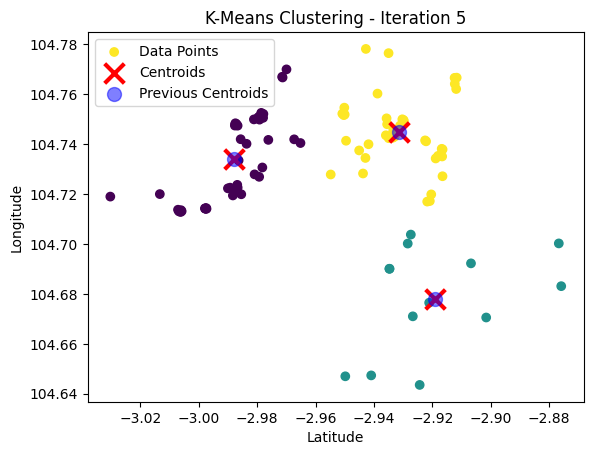

K-Means iteration 6/19


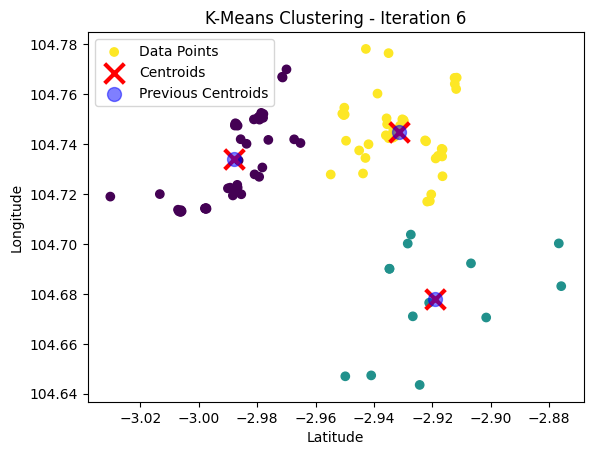

K-Means iteration 7/19


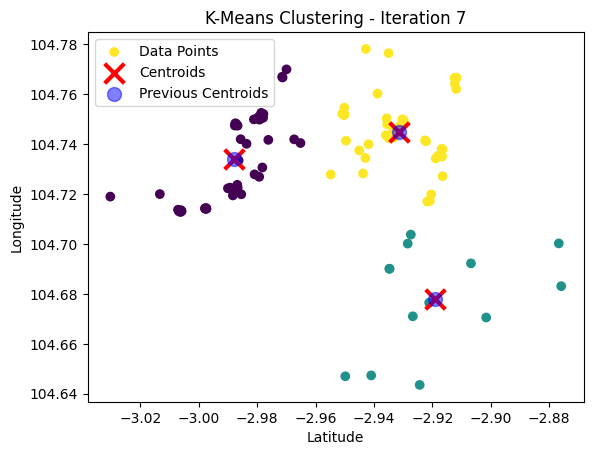

K-Means iteration 8/19


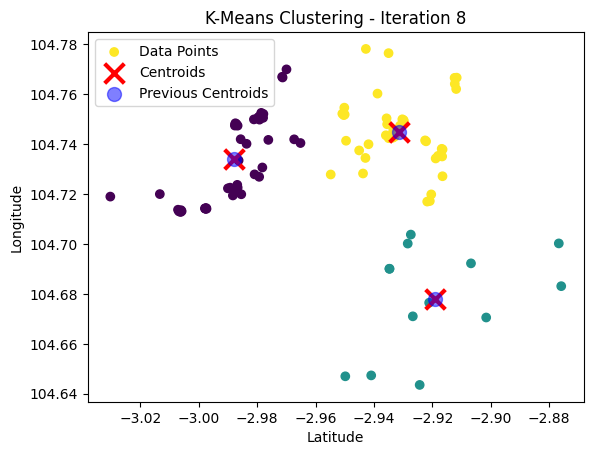

K-Means iteration 9/19


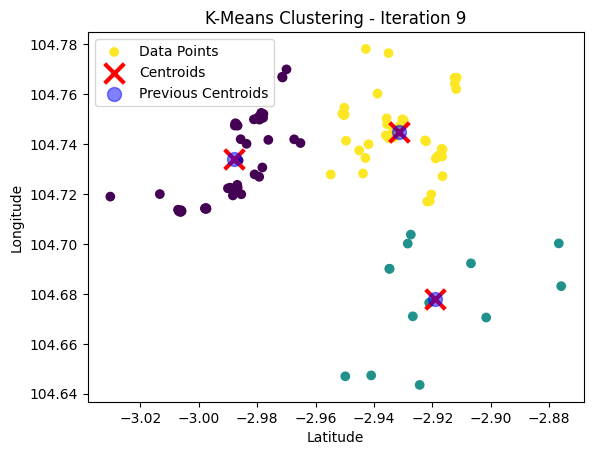

K-Means iteration 10/19


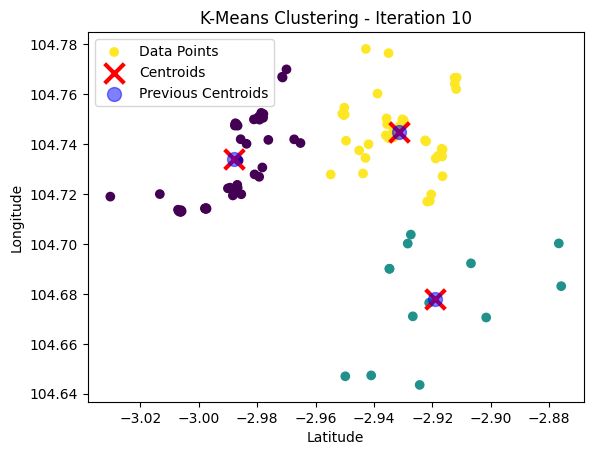

K-Means iteration 11/19


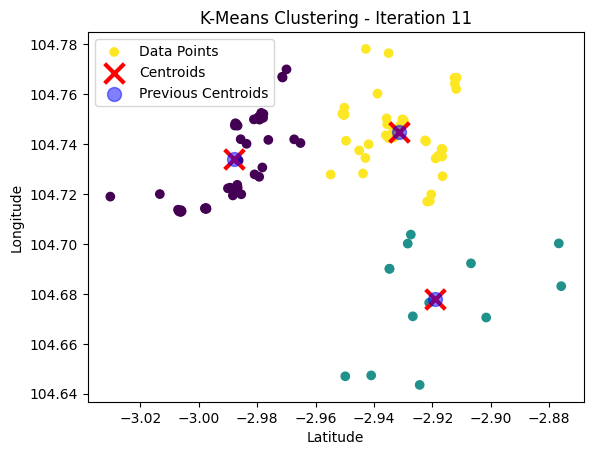

K-Means iteration 12/19


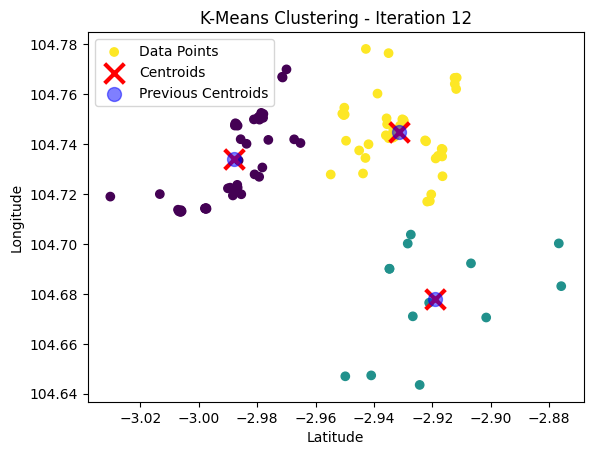

K-Means iteration 13/19


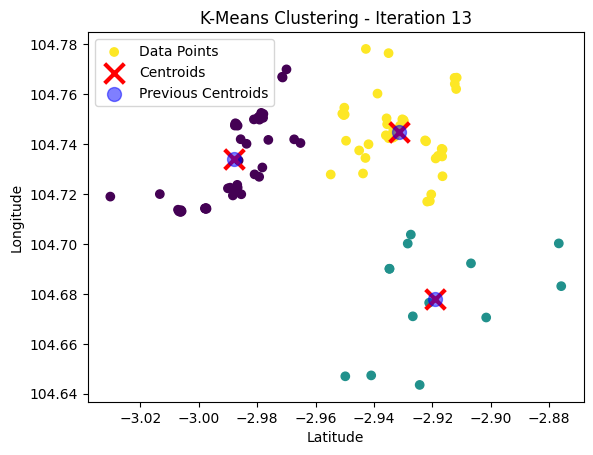

K-Means iteration 14/19


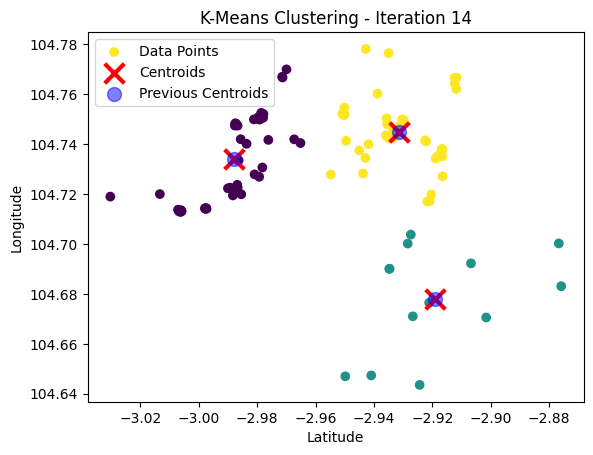

K-Means iteration 15/19


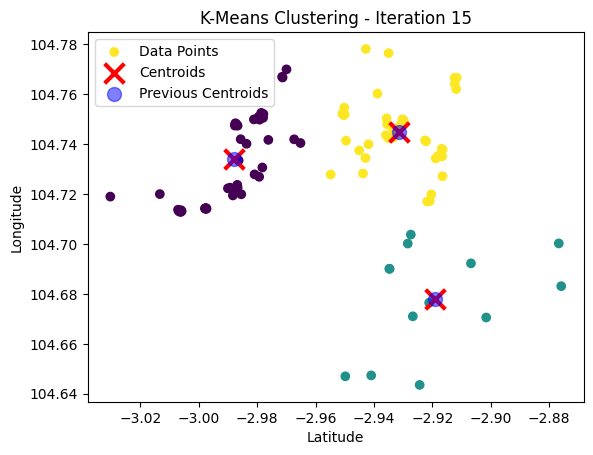

K-Means iteration 16/19


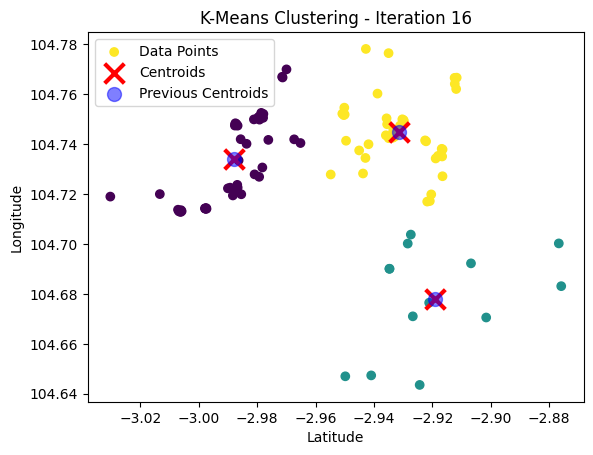

K-Means iteration 17/19


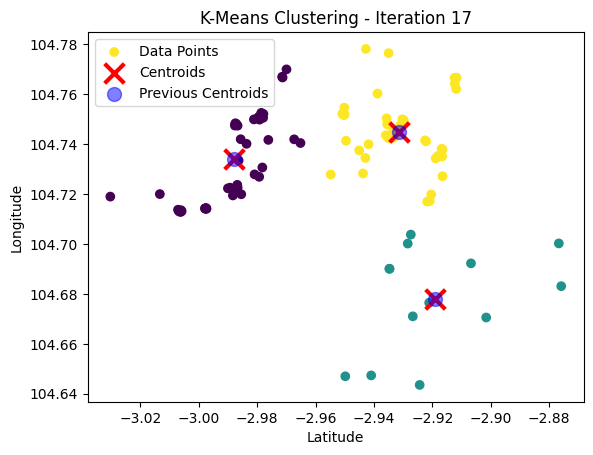

K-Means iteration 18/19


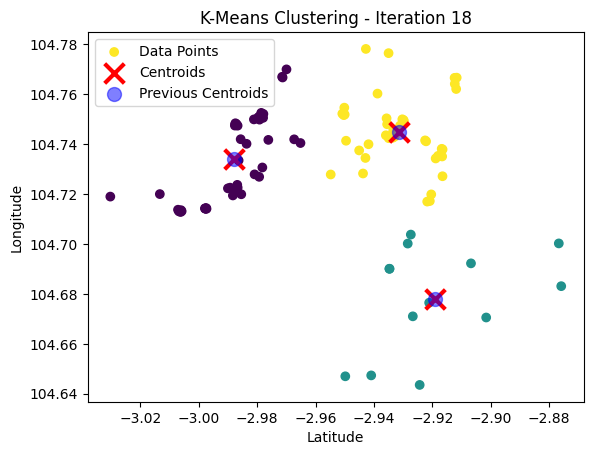

K-Means iteration 19/19


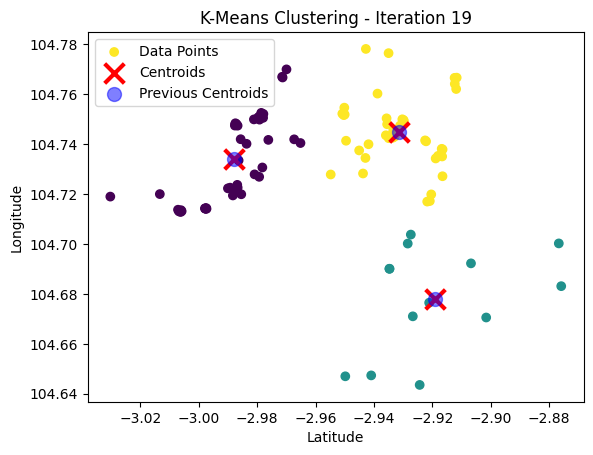

In [27]:
K = 3
max_iters = 20

# Set initial centroids by picking random examples from the dataset
initial_centroids = kMeans_init_centroids(X, K)

# Run K-Means
centroids, idx = run_kMeans(X, initial_centroids, max_iters, plot_progress=True)



# **Saving the model**


In [28]:
# Save the trained model
joblib.dump(centroids, 'kmeans_model.pkl')
print("K-Means model saved.")

K-Means model saved.


# **Changing it to tf format**

In [33]:
import tensorflow as tf

# Load centroids from the PKL file
centroids = joblib.load('kmeans_model.pkl')

# Convert centroids to TensorFlow constants
centroids_tf = tf.constant(centroids, dtype=tf.float32)

# Define a simple model function
@tf.function(input_signature=[tf.TensorSpec(shape=(None, centroids.shape[1]), dtype=tf.float32)])
def predict(input_data):
    return {'centroids': centroids_tf}

# Create a SavedModel
model = tf.Module()
model.predict = predict

# Save the model
tf.saved_model.save(model, 'Clustering_Model', signatures={'serving_default': model.predict})

In [35]:
import zipfile
with zipfile.ZipFile('/content/Clustering_Model.zip', 'w') as zipf:
    zipf.write('/content/Clustering_Model')

In [37]:
from google.colab import files

# Download the zip file
files.download('/content/Clustering_Model.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>